<p style="font-size:300%; background-color:gray; color:white; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Tarea 1. Interpolación y rotación de Imagenes</p>
<p style="font-size:240%; background-color:gray; color:white; text-align:center;line-height : 60px; margin : 0; padding : 0;">
Visión de Máquina</p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>Jefferson Javier Hernandez Panqueba</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email: jejhernandezpa@unal.edu.co</p>
<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> 
<br>Jaime Andrés Castillo León</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email:jacastillol@unal.edu.co</p>
<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>25 de Febrero de 2018</p>

<h1 style="font-size:200%; background-color:gray; color:white; text-align:center; line-height : 60px;">
Contenido </h1>

<ol style="font-size:120%; line-height : 35px;">
    <li>
        <h3>Estudiar e implementar las principales técnicas de interpolación:</h3>
        <ul>
            <li>Vecino más cercano.</li>
            <li>Bilineal.</li>
            <li>Bicubica.</li>
            <li>B-splines.</li>
       </ul>
    </li>
    <li>
        <h3>Evaluar cuantitativamente el desempeño de las técnicas de interpolación implementadas</h3>
    </li>
    <li>
        <h3>Desarrollar una función para rotar de imágenes, cuyo parámetro de entrada sea el ángulo de rotación y cuya salida sea la imagen rotada y debidamente interpolada.</h3>
    </li>
</ol>


<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernandez & J.A. Castillo </h1>

In [1]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

N= 553 M= 900


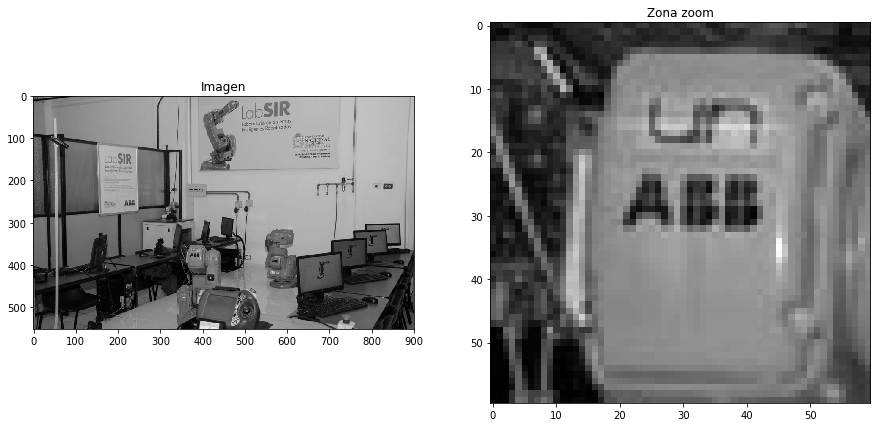

In [2]:
#img = cv2.imread('ABBpicking.jpg',0)
#img = cv2.imread('BIOLOIDpostures.jpg',0)
img = cv2.imread('labSIR.jpg',0)
#img = cv2.imread('NAOpostures.jpg',0)
N, M = img.shape[:2]

print('N=', N, 'M=', M)
d=8;
ZonaCentral = img[350:410,350:410]

plt.figure(1,figsize=(15,45))
plt.subplot(121), plt.imshow(img, cmap=plt.cm.gray), plt.title('Imagen')
plt.subplot(122), plt.imshow(ZonaCentral, cmap=plt.cm.gray, interpolation='none'), plt.title('Zona zoom')

plt.show()


<h3>1. Estudiar e implementar las principales técnicas de interpolación:</h3>
        <ul>
            <li>Vecino más cercano.</li>
            <li>Bilineal: Se encuentra la siguiente forma para el kernel
            \begin{equation}
            f(x)\,=\,\left\{
            \begin{array} 
            \,1-|x|&\to 0\le|x|<1\\
            \,0&\to \text{elsewhere}
            \end{array}\right. 
            \end{equation} 
            con $x$ la distancia euclidania a punto, $f_i(x_i)$ que se conoce de la imagen original en $x_i$.
            Por la interpolación tradicional se encuentra tambien:
            \begin{equation}
            f(x,y)\,=\,a+bx+cy+dxy
            \end{equation}
            donde $a$, $b$, $c$ y $d$ se calculan apartir de la vecindad de cuatro pixels.
            </li>
            <li>Bicubica: La implementación de OpenCV y PIL utiliza polinomios de 3er orden.</li>
            <li>B-splines: PIL utiliza polinomios de tercer orden y llama el metodo bicubico o splines de forma indistinta. OpenCV no presenta la interp. bicúbica como con splines, sin embargo presenta presenta la interpolacion de Lanczos utilzando sinusoidales.</li>
       </ul>
       <p> A continuación se implementa un kernel para cada uno de los métodos anteriormente mostrados:</p>
       
       
<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernandez & J.A. Castillo </h1>

In [3]:
def nearest_neighbor_interp_fcn(h,d):
    h[d<0.5] = 1
    return h
def bilinear_interp_fcn(h,d):
    h[(d<1)*(d>0)]=1-d[(d<1)*(d>0)]
    return h
def bicubic_interp_fcn(h,d,a=-1):
    # a = {-1, -0.75, -0.5}
    h[(d<1)*(d>=0)]=1-(a+3)*d[(d<1)*(d>=0)]**2+(a+2)*d[(d<1)*(d>=0)]**3
    h[(d<2)*(d>=1)]=4*a-8*a*d[(d<2)*(d>=1)]+5*a*d[(d<2)*(d>=1)]**2-a*d[(d<2)*(d>=1)]**3
    return h
def spline_interp_fcn(h,d):
    h[(d<1)*(d>=0)]=4-6*d[(d<1)*(d>=0)]**2+3*d[(d<1)*(d>=0)]**3
    h[(d<2)*(d>=1)]=8-12*d[(d<2)*(d>=1)]+6*d[(d<2)*(d>=1)]**2-d[(d<2)*(d>=1)]**3
    return h

def resize_image(img, interp_fcn):
    n,m=img.shape
    new_img = np.zeros((2*(n-1),2*(m-1)))
    for i in range(0,n-1):
        for j in range(0,m-1):
            pxy = np.zeros((2,2))
            for idx,dx in enumerate([0.25,0.75]):
                for jdy,dy in enumerate([0.25,0.75]):
                    dij,hij = np.zeros((2,2)),np.zeros((2,2))
                    x,y = dx+i,dy+j
                    for ix in range(0,2):
                        for jy in range(0,2):
                            # dij[ix,jy] = np.sum(np.abs(np.array([x-(ix+i),y-(jy+j)])))
                            dij[ix,jy] = np.sqrt(np.sum(np.array([x-(ix+i),y-(jy+j)])**2))
                    pij = img[i:i+2,j:j+2]
                    hij = interp_fcn(hij,dij)
                    pxy[idx,jdy] = np.sum(pij*hij)
                    new_img[2*i:2*(i+1),2*j:2*(j+1)] = pxy
    return np.round(new_img)

<h3>2. Evaluar cuantitativamente el desempeño de las técnicas de interpolación implementadas</h3>
<p>A continuación se evaluan de forma cualitativa los métodos de interpolación. De mejor a pero resultado visual sería: (1) Lanczos, (2) Splines y Bicubic, (3) Bilinear y (4) Nearest Neighbor.</p> 
<p>De la misma forma el desempeño en el tiempo de peor a mejor desempeño es: (1) Lanczos, (2) Splines y Bicubic, (3) Bilinear y (4) Nearest Neighbor. Esto es debido a la complejidad del kernel</p>

<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernandez & J.A. Castillo </h1>

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe90ebe7320>,
 <matplotlib.text.Text at 0x7fe90eb6b390>)

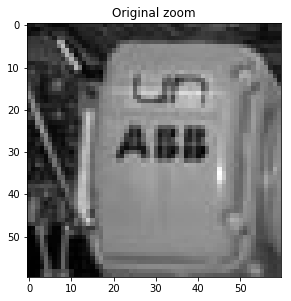

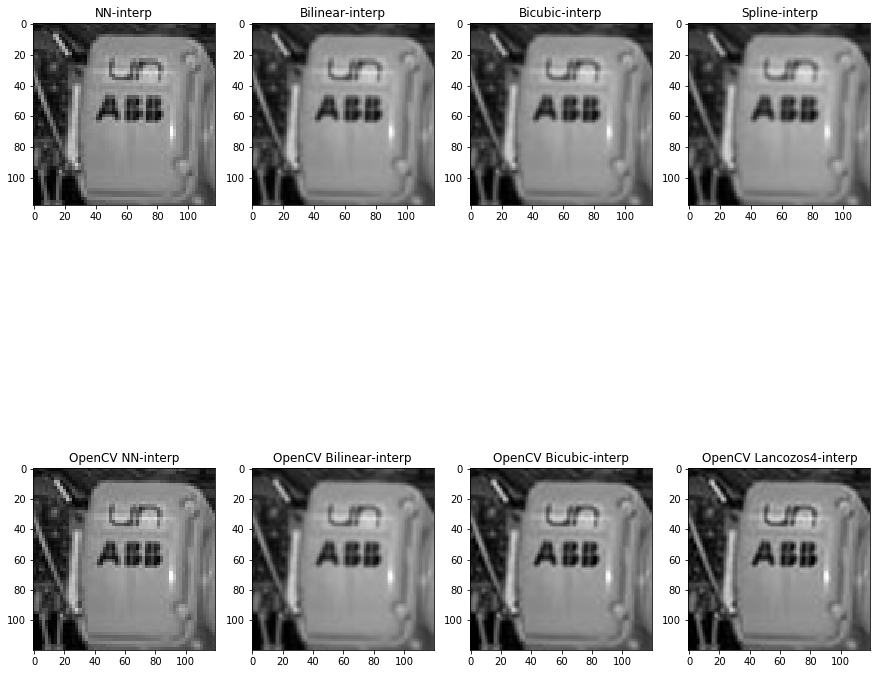

In [4]:
img = ZonaCentral

width, height = img.shape

plt.figure(1,figsize=(10,20))
plt.subplot(1,2,1),plt.imshow(ZonaCentral, cmap=plt.cm.gray, interpolation='none'), plt.title('Original zoom')

plt.figure(2,figsize=(15,15))
new_img = resize_image(img,nearest_neighbor_interp_fcn)
new_img_OCV = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_NEAREST)
plt.subplot(2,4,1), plt.imshow(new_img, cmap=plt.cm.gray, interpolation='none'), plt.title('NN-interp')
plt.subplot(2,4,5), plt.imshow(new_img_OCV, cmap=plt.cm.gray, interpolation='none'), plt.title('OpenCV NN-interp')

new_img = resize_image(img,bilinear_interp_fcn)
new_img_OCV = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_LINEAR)
plt.subplot(2,4,2), plt.imshow(new_img, cmap=plt.cm.gray, interpolation='none'), plt.title('Bilinear-interp')
plt.subplot(2,4,6), plt.imshow(new_img_OCV, cmap=plt.cm.gray, interpolation='none'), plt.title('OpenCV Bilinear-interp')

new_img = resize_image(img,bicubic_interp_fcn)
new_img_OCV = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
plt.subplot(2,4,3), plt.imshow(new_img, cmap=plt.cm.gray, interpolation='none'), plt.title('Bicubic-interp')
plt.subplot(2,4,7), plt.imshow(new_img_OCV, cmap=plt.cm.gray, interpolation='none'), plt.title('OpenCV Bicubic-interp')

new_img = resize_image(img,spline_interp_fcn)
new_img_OCV = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_LANCZOS4)
plt.subplot(2,4,4), plt.imshow(new_img, cmap=plt.cm.gray, interpolation='none'), plt.title('Spline-interp')
plt.subplot(2,4,8), plt.imshow(new_img_OCV, cmap=plt.cm.gray, interpolation='none'), plt.title('OpenCV Lancozos4-interp')


<h3> 3. Desarrollar una función para rotar de imágenes, cuyo parámetro de entrada sea el ángulo de rotación y cuya salida sea la imagen rotada y debidamente interpolada.</h3>
<p>Primero duplica el canvas, luego se rota la imagen, luego se tratan los agujeros mediante un promedio, y luego un suavizado con una interpolacion </p>

<h1 style="font-size:100%; background-color:rgba(150, 150, 150, 1.0); color:white; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; J.J. Hernandez & J.A. Castillo </h1>

In [5]:
def rotate_image(img,th):
    # angulo de rotación
    # th = 45*np.pi/180
    R = np.matrix([[np.cos(th),-np.sin(th)],[np.sin(th),np.cos(th)]])

    N,M = img.shape
    rot_box = (R*np.array([[N,0],[0,M],[N,M],[0,0]]).T)

    newN,newM = (int(np.ceil(rot_box[0,:].max()-rot_box[0,:].min())),
                 int(np.ceil(rot_box[1,:].max()-rot_box[1,:].min())))
    new_img = np.zeros((2*newN,2*newM))
    tr = np.array([[N],[M]])
    for i in range(0,N):
        for j in range(0,M):
            #print('(i,j):=',i,j)
            idx_rot = np.round(R*np.array([[i],[j]])+1*tr)
            #print(idx_rot)
            new_img[int(idx_rot[0]),int(idx_rot[1])] = img[i,j]
            
    return new_img

def interp_after_rotated_image(img):
    for i in range(1,img.shape[0]):
        for j in range(1,img.shape[1]):
            if img[i,j]==0:
                img[i,j] = (np.sum(img[i-1:i+2,j-1:j+2]))/8
    return img


(<matplotlib.image.AxesImage at 0x7fe90e81bb70>,
 <matplotlib.text.Text at 0x7fe90e825da0>)

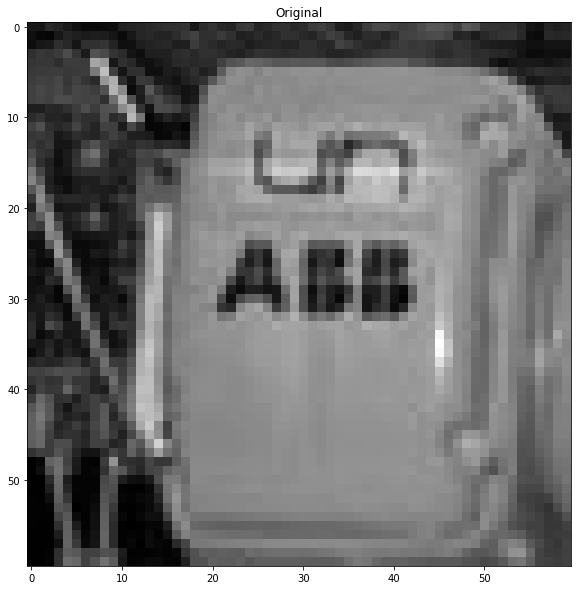

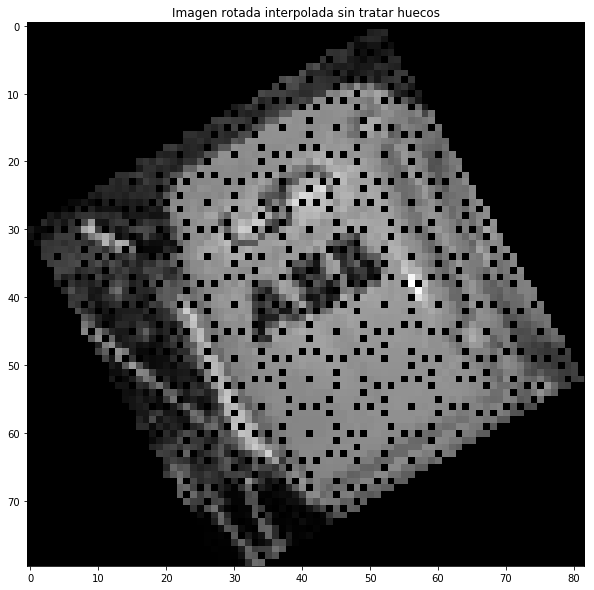

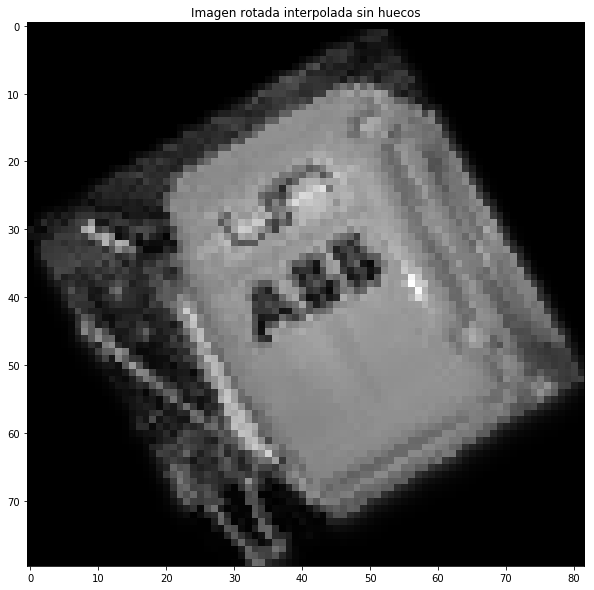

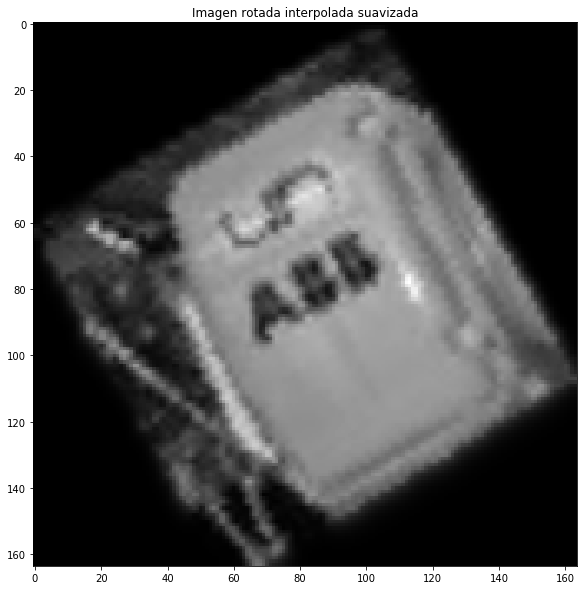

In [6]:
img = ZonaCentral

plt.figure(1,figsize=(10,10))
plt.imshow(img,cmap=plt.cm.gray,interpolation='none'), plt.title('Original')
plt.figure(2,figsize=(10,10))
new_img = rotate_image(img,30*np.pi/180)
newN,newM = new_img.shape
# Cut image
new_img = new_img[30:110,60:142]
plt.figure(3,figsize=(10,10))
plt.imshow(new_img,cmap=plt.cm.gray,interpolation='none'), plt.title('Imagen rotada interpolada sin tratar huecos')
# fill holes
new_img = interp_after_rotated_image(new_img)
plt.figure(4,figsize=(10,10))
plt.imshow(new_img,cmap=plt.cm.gray,interpolation='none'), plt.title('Imagen rotada interpolada sin huecos')
# post-interpolation
plt.figure(5,figsize=(10,10))
new_img = cv2.resize(new_img,(1*newN, 1*newM), interpolation = cv2.INTER_LINEAR)
plt.imshow(new_img,cmap=plt.cm.gray,interpolation='none'), plt.title('Imagen rotada interpolada suavizada')